In [3]:
import os
from pathlib import Path
from operator import itemgetter
import pickle
import pydicom
from time import time
import pandas

import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, MultiPolygon, LineString, GeometryCollection, Point, MultiPoint
from shapely.affinity import translate

from catch_converter.parse_contours import parse_cvi42ws
from LazyLuna.Mini_LL import *
from LazyLuna.CATCH_utils import *
from LazyLuna.Figures import *

In [4]:
# basepaths
bp        = '/Users/dietrichhadler/Desktop/Daten/CAMAID'
bp_annos1 = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Gold'
bp_annos2 = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Reader2'
bp_cases  = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Cases'
bp_imgs   = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Imgs'

In [5]:
case_name = 'CAMAID_003_1'
# get the paths of imgs and annotations via SeriesInstanceUIDs
imgp, annop = [(p1,p2) for p1,p2 in get_imgs_and_annotation_paths(bp_imgs, bp_annos2) if case_name in p1][0]

print(imgp, annop)
cases = []
st = time()
case = Case(imgp, annop, os.path.basename(imgp), os.path.basename(bp_annos1))

#sax_cine_view = SAX_CINE_View()
#sax_cs_view   = SAX_CS_View()
#case = sax_cine_view.customize_case(case)
#case = sax_cs_view.customize_case(case)
#case.store(bp_cases)
#cases.append(case)
print('Case customization took: ', time()-st, 'Case: ', case.reader_name, case.case_name)

/Users/dietrichhadler/Desktop/Daten/CAMAID/Imgs/CAMAID_003_1 /Users/dietrichhadler/Desktop/Daten/CAMAID/Reader2/1.3.12.2.1107.5.2.41.69541.30000021043005072317400000006
Case customization took:  8.062376260757446 Case:  Gold CAMAID_003_1


In [9]:
print(len(case.all_imgs_sop2filepath['LAX 2CV']))
print(len(case.all_imgs_sop2filepath['LAX 3CV']))
print(len(case.all_imgs_sop2filepath['LAX 4CV']))
print(len(case.annos_sop2filepath))

lax_cine_view   = LAX_CINE_View()
case = lax_cine_view.customize_case(case)
print([c.name for c in case.categories])

30
30
60
38
['LAX 4CV LVES', 'LAX 4CV LVED', 'LAX 4CV RVES', 'LAX 4CV RVED', 'LAX 4CV LAES', 'LAX 4CV LAED', 'LAX 4CV RAES', 'LAX 4CV RAED', 'LAX 2CV LVES', 'LAX 2CV LVED', 'LAX 2CV LAES', 'LAX 2CV LAED']


/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Mini_LL.py:156: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  lv_ext1, lv_ext2, apex = scale(extent, xfact=self.pixel_w, yfact=self.pixel_h)
/Users/dietrichhadler/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/CATCH_utils.py:192: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xs, ys = [point.x for point in points], [point.y for point in points]


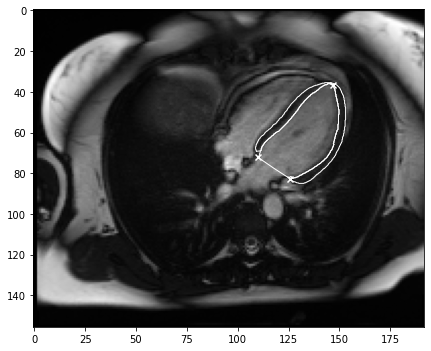

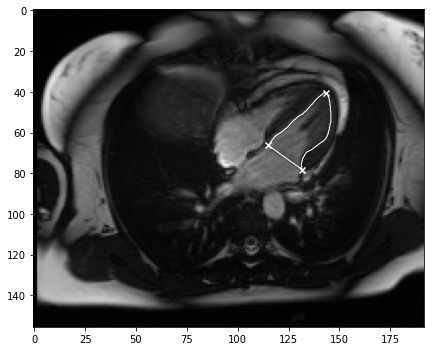

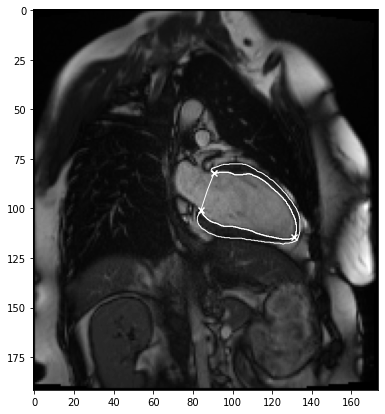

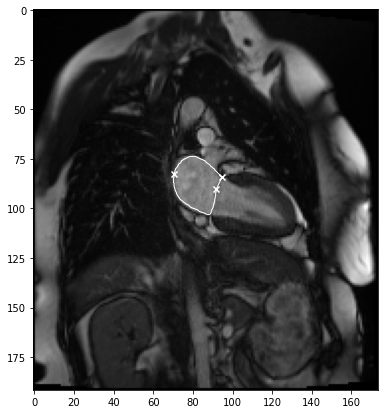

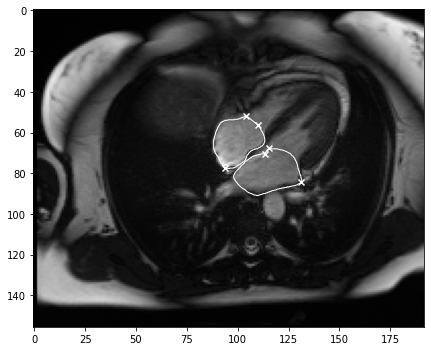

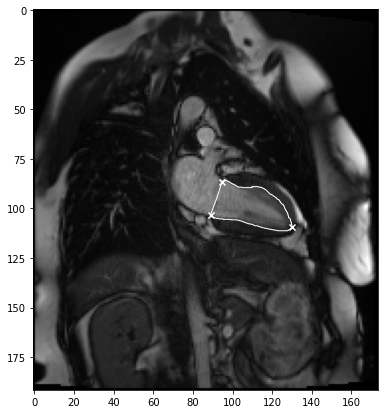

In [5]:
for sop, annop in case.annos_sop2filepath.items():
    lax_anno = LAX_CINE_Annotation(sop, annop)
    if not ('la' in lax_anno.anno.keys() or 'ra' in lax_anno.anno.keys() or 'lv_lax_endo' in lax_anno.anno.keys()): continue
    img = case.all_imgs_sop2filepath['LAX 4CV'][sop] if sop in case.all_imgs_sop2filepath['LAX 4CV'] else case.all_imgs_sop2filepath['LAX 2CV'][sop]
    img = pydicom.dcmread(img).pixel_array
    fig, ax = plt.subplots(1,1,figsize=(7,7))
    ax.imshow(img, cmap='gray')
    lax_anno.length_LV()
    lax_anno.plot_all_contour_outlines(ax)
    lax_anno.plot_all_points(ax)
    plt.show()

Took:  2.0447282791137695
LAX 4CV LVES 10
LAX 4CV LVED 28
LAX 4CV LAES 12
LAX 4CV LAED 12
LAX 4CV RAES 12
LAX 4CV RAED 12
LAX 2CV LVES 10
LAX 2CV LVED 28
LAX 2CV LAES 12
LAX 2CV LAED 12

4CV LVESV 36.08
4CV LVEDV 102.55
4CV LVSV 66.47
4CV LVEF 64.82
2CV LVESV 48.60
2CV LVEDV 117.74
2CV LVSV 69.14
2CV LVEF 58.73
BIPLANE LVESV 43.66
BIPLANE LVEDV 110.38
BIPLANE LVSV 66.72
BIPLANE LVEF 60.45
4CV RAESAREA 13.88
4CV RAEDAREA 13.88
4CV RAESV 40.57
4CV RAEDV 40.57
4CV LAESAREA 16.49
4CV LAEDAREA 16.49
4CV LAESV 57.30
4CV LAEDV 57.30
2CV LAESAREA 15.33
2CV LAEDAREA 15.33
2CV LAESV 48.60
2CV LAEDV 48.60
BIPLANAE LAESV 53.24
BIPLANAR LAEDV 53.24


/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Mini_LL.py:164: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  lv_ext1, lv_ext2, apex = scale(extent, xfact=self.pixel_w, yfact=self.pixel_h)


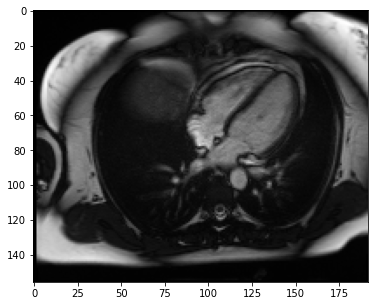

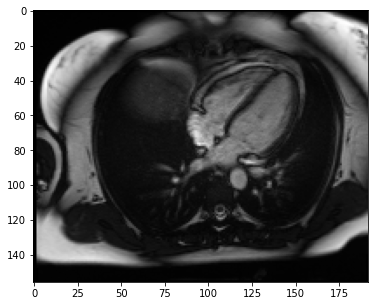

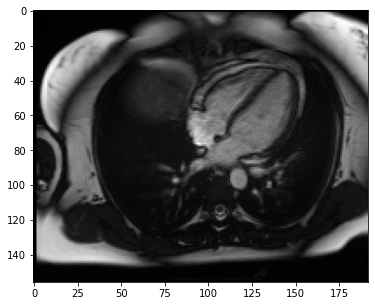

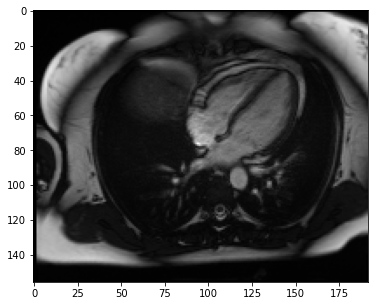

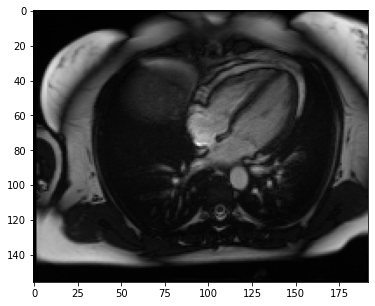

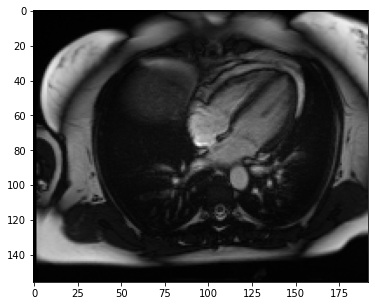

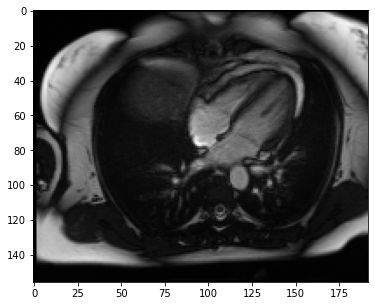

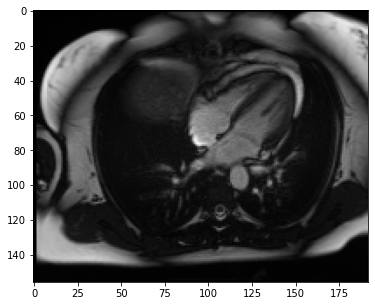

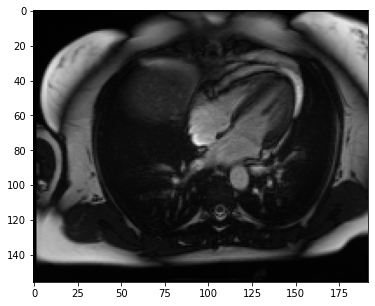

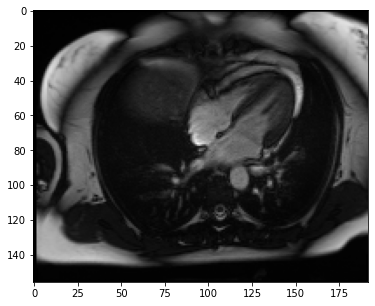

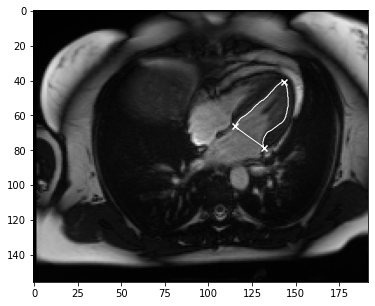

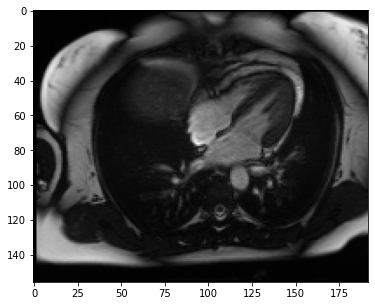

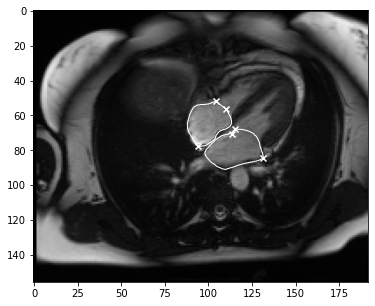

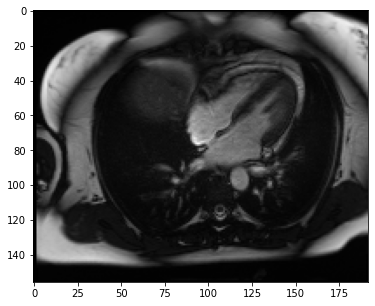

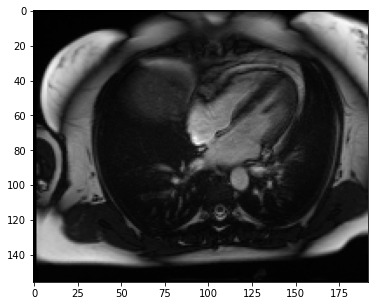

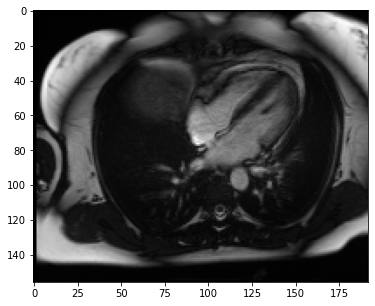

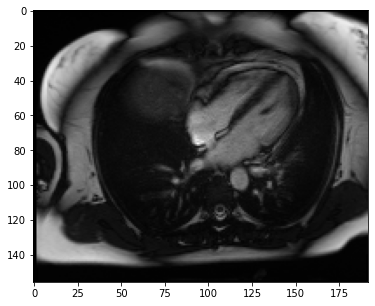

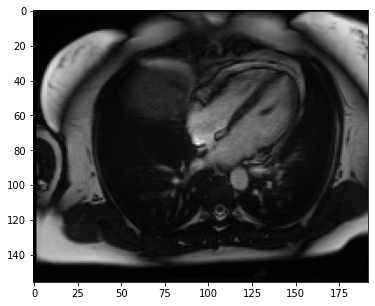

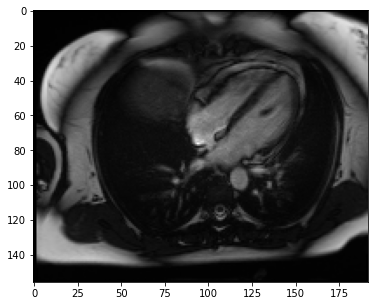

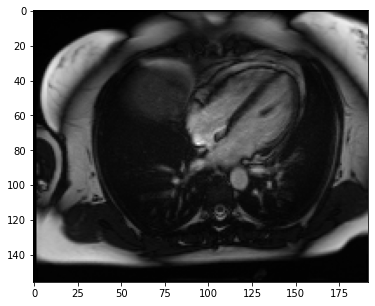

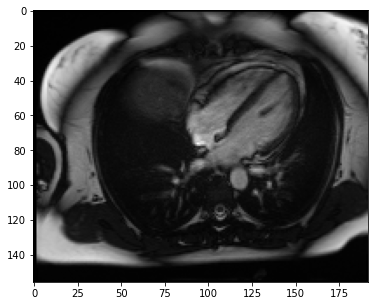

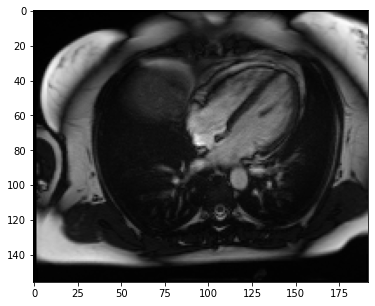

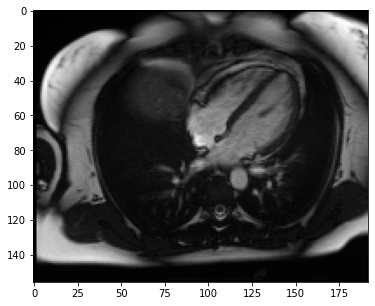

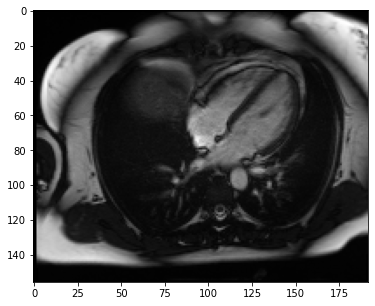

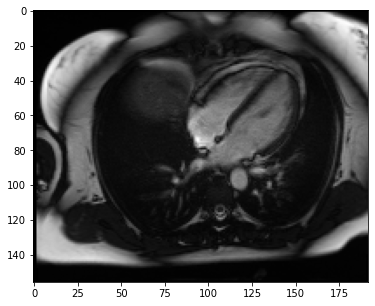

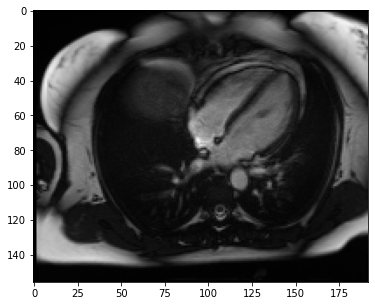

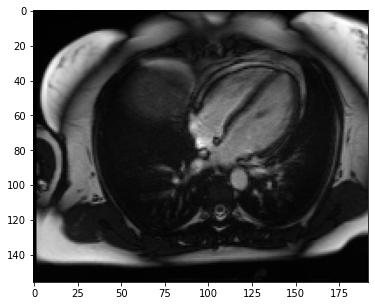

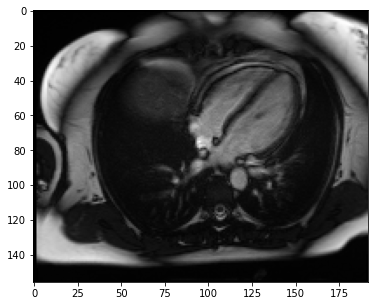

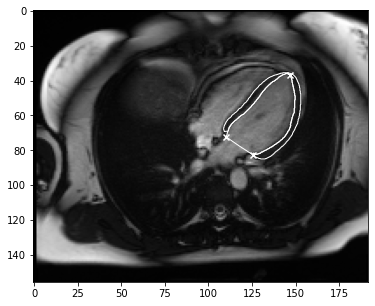

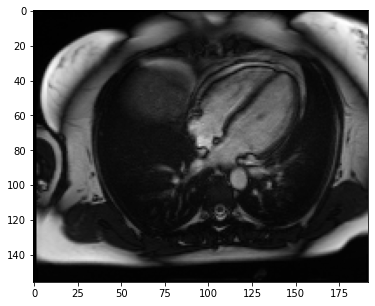

In [6]:
st = time()
view = LAX_CINE_View()
case = view.initialize_case(case)
case = view.customize_case(case)
print('Took: ', time()-st)

for i in range(len(case.categories)): print(case.categories[i].name, case.categories[i].phase)
print()
for i in range(len(case.crs)): print(case.crs[i].name, case.crs[i].get_cr(string=True))


for p in range(case.categories[4].nr_phases):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    img  = case.categories[0].get_img (0, p)
    anno = case.categories[0].get_anno(0, p)
    ax.imshow(img, cmap='gray')
    anno.plot_all_contour_outlines(ax)
    anno.plot_all_points(ax)
    plt.show()